# Introduction

In this project I will analyze data regarding the nutrient values of 80 cereals

The goals are to prepare data, followed by analysis with plots, and seek to explain the findings from the data.

Here are a few questions that this project will seek to answer:

+ What are the nutrient values of each cereal?
+ Has life expectancy increased over time in the six nations?
+ What is the GDP in these nations?
+ Has GDP increased over time in the six nations?
+ Is there a correlation between GDP and life expectancy of a country?

**Data sources**

- GDP Source: [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) national accounts data, and OECD National Accounts data files.

- Life expectancy Data Source: [World Health Organization](http://apps.who.int/gho/data/node.main.688)

In [404]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from chart_studio.plotly import iplot
from  plotly.offline import plot
import plotly.offline as py 
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import warnings

# Data Inspection

After loading the data and inspecting its' contents, I have determined the following:

+ The data types of all values are represented accurately
+ There are no missing (null) values
+ The dataset is relatively small and the scope is very narrow

In [405]:
df = pd.read_csv('cereal.csv')
df.columns
df.describe()
df.dtypes
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


name mfr type  calories  protein  fat  sodium  fiber  \
0                  100% Bran   N    C        70        4    1     130   10.0   
1          100% Natural Bran   Q    C       120        3    5      15    2.0   
2                   All-Bran   K    C        70        4    1     260    9.0   
3  All-Bran with Extra Fiber   K    C        50        4    0     140   14.0   
4             Almond Delight   R    C       110        2    2     200    1.0   
5    Apple Cinnamon Cheerios   G    C       110        2    2     180    1.5   
6                Apple Jacks   K    C       110        2    0     125    1.0   
7                    Basic 4   G    C       130        3    2     210    2.0   
8                  Bran Chex   R    C        90        2    1     200    4.0   
9                Bran Flakes   P    C        90        3    0     210    5.0   

   carbo  sugars  potass  vitamins  shelf  weight  cups     rating  
0    5.0       6     280        25      3    1.00  0.33  68.402973  
1    8.0       8     135         0      3    1.00  1.00  33.983679  
2    7.0       5     320        25      3    1.00  0.33  59.425505  
3    8.0       0     330        25      3    1.00  0.50  93.704912  
4   14.0       8      -1        25      3    1.00  0.75  34.384843  
5   10.5      10      70        25      1    1.00  0.75  29.509541  
6   11.0      14      30        25      2    1.00  1.00  33.174094  
7   18.0       8     100        25      3    1.33  0.75  37.038562  
8   15.0       6     125        25      1    1.00  0.67  49.120253  
9   13.0       5     190        25      3    1.00  0.67  53.313813

# Data Cleaning

Removing unnecessary columns to make the dataset easier to work with

In [406]:
df = df.drop(columns=['mfr', 'type', 'shelf', 'weight'])
df

name  calories  protein  fat  sodium  fiber  carbo  \
0                   100% Bran        70        4    1     130   10.0    5.0   
1           100% Natural Bran       120        3    5      15    2.0    8.0   
2                    All-Bran        70        4    1     260    9.0    7.0   
3   All-Bran with Extra Fiber        50        4    0     140   14.0    8.0   
4              Almond Delight       110        2    2     200    1.0   14.0   
..                        ...       ...      ...  ...     ...    ...    ...   
72                    Triples       110        2    1     250    0.0   21.0   
73                       Trix       110        1    1     140    0.0   13.0   
74                 Wheat Chex       100        3    1     230    3.0   17.0   
75                   Wheaties       100        3    1     200    3.0   17.0   
76        Wheaties Honey Gold       110        2    1     200    1.0   16.0   

    sugars  potass  vitamins  cups     rating  
0        6     280        25  0.33  68.402973  
1        8     135         0  1.00  33.983679  
2        5     320        25  0.33  59.425505  
3        0     330        25  0.50  93.704912  
4        8      -1        25  0.75  34.384843  
..     ...     ...       ...   ...        ...  
72       3      60        25  0.75  39.106174  
73      12      25        25  1.00  27.753301  
74       3     115        25  0.67  49.787445  
75       3     110        25  1.00  51.592193  
76       8      60        25  0.75  36.187559  

[77 rows x 12 columns]

# Data Analysis

I'm going to dig through the data to find some questions to answer.

## What are Nutrition Facts and why are they important?

The Nutrition Facts label provides detailed information about a food's nutrient content, such as the amount of fat, sugar, sodium and fiber it has. The purpose of this label is to help consumers make more informed choices. This label is required by the Food and Drug Administration (FDA) on most packaged foods and beverages.

-- Source
[Mayo Clinic](https://www.mayoclinic.org/healthy-lifestyle/nutrition-and-healthy-eating/in-depth/nutrition-facts/art-20048426#:~:text=The%20Nutrition%20Facts%20label%20is,sodium%20and%20fiber%20it%20has.)

## How many calories should breakfast provide?

[NHS Report](https://www.nhs.uk/live-well/eat-well/healthy-breakfast-cereals/) says:

A helpful rule of thumb to maintain a healthy weight is to follow the 400-600-600 approach.

That means having about:

* 400kcal for breakfast
* 600kcal for lunch
* 600kcal for dinner

That leaves you with just enough left over to enjoy a few healthy drinks and snacks throughout the day.

This advice is based on a woman's daily recommended calorie intake of 2,000kcal.

## What are the nutrient levels in these cereals?

<ipython-input-350-62a5675f4cbd>:13: UserWarning:

FixedFormatter should only be used together with FixedLocator



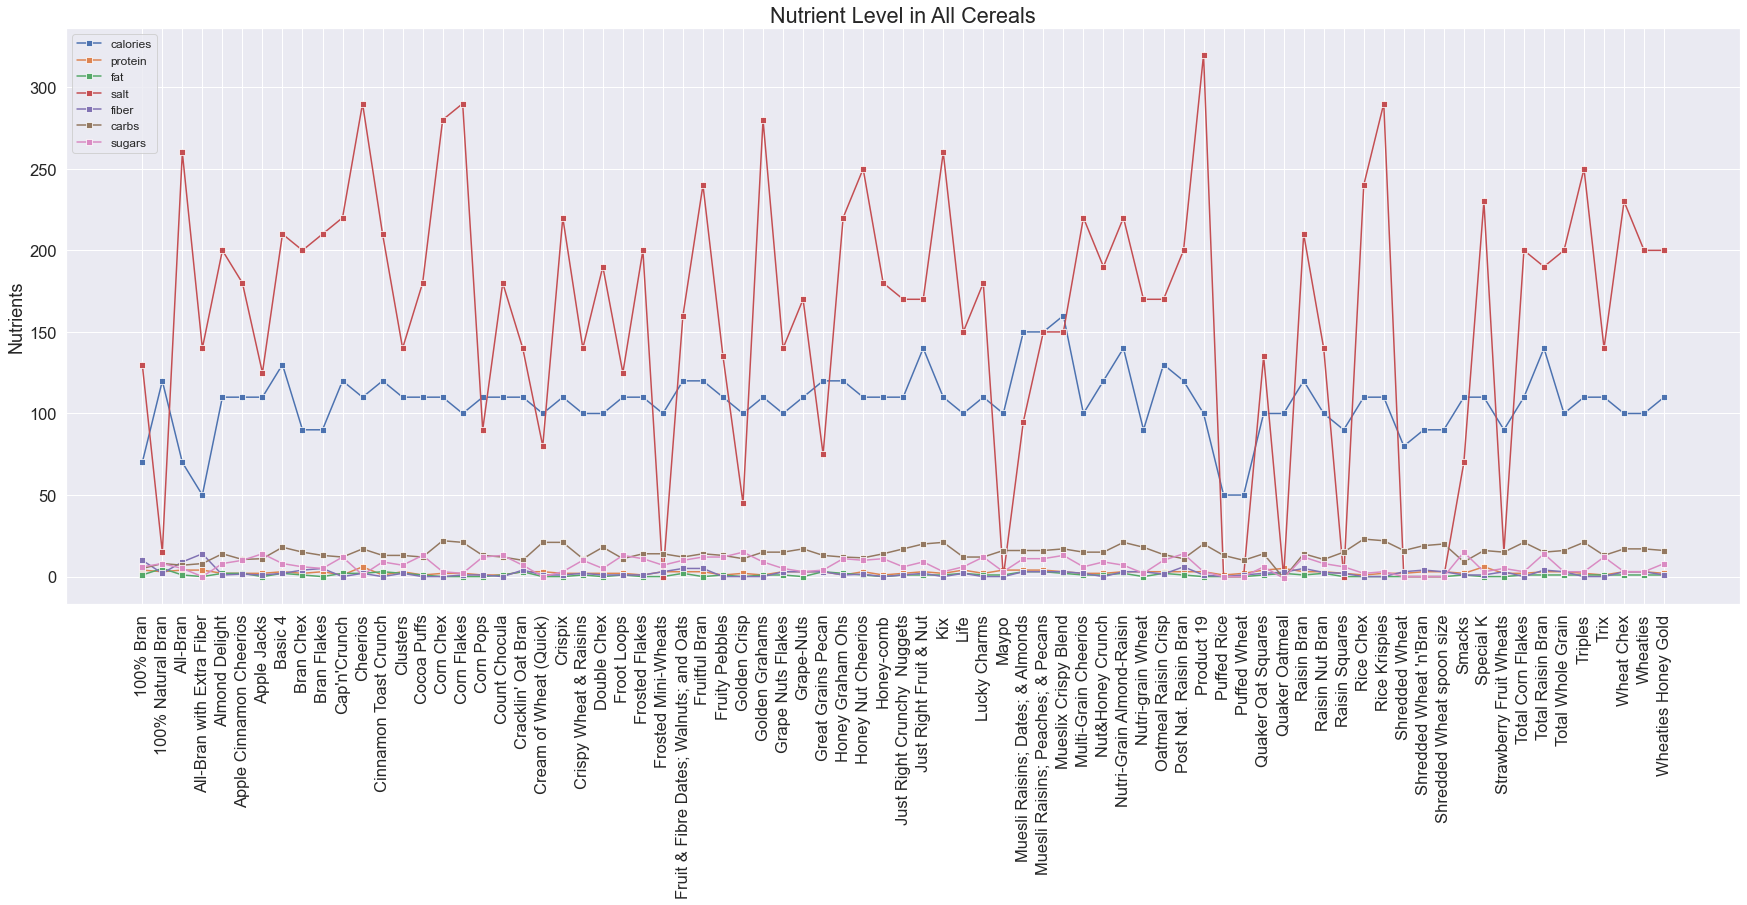

In [ ]:
f, ax = plt.subplots(figsize=(30,8))
sns.set_style('darkgrid')
sns.set(font_scale=1.8)
sns.set_palette('bright')

ax = sns.lineplot(x='name', y='calories', data=df, label='calories', marker='s')
ax = sns.lineplot(x='name', y='protein', data=df, label='protein', marker='s')
ax = sns.lineplot(x='name', y='fat', data=df, label='fat', marker='s')
ax = sns.lineplot(x='name', y='sodium', data=df, label='salt', marker='s')
ax = sns.lineplot(x='name', y='fiber', data=df, label='fiber', marker='s')
ax = sns.lineplot(x='name', y='carbo', data=df, label='carbs', marker='s')
ax = sns.lineplot(x='name', y='sugars', data=df, label='sugars', marker='s')
ax.set_xticklabels(df.name, rotation=90, ha='center')
ax.set(xlabel='',ylabel='Nutrients')
ax.set_title('Nutrient Level in All Cereals')
plt.legend(loc=2, fontsize=12)

plt.subplots_adjust(hspace=3, top=2, bottom=1)
plt.savefig('df_nutrients.png')
plt.show()

### In order to observe the dataset as a whole, `DataFrame.hist()` is used.. It gives a full view of all numerical variables in the distribution. Most of the amount bought and number purchased variables are skewed right and have similar distributions.

<ipython-input-408-9fbcf0adb942>:3: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared



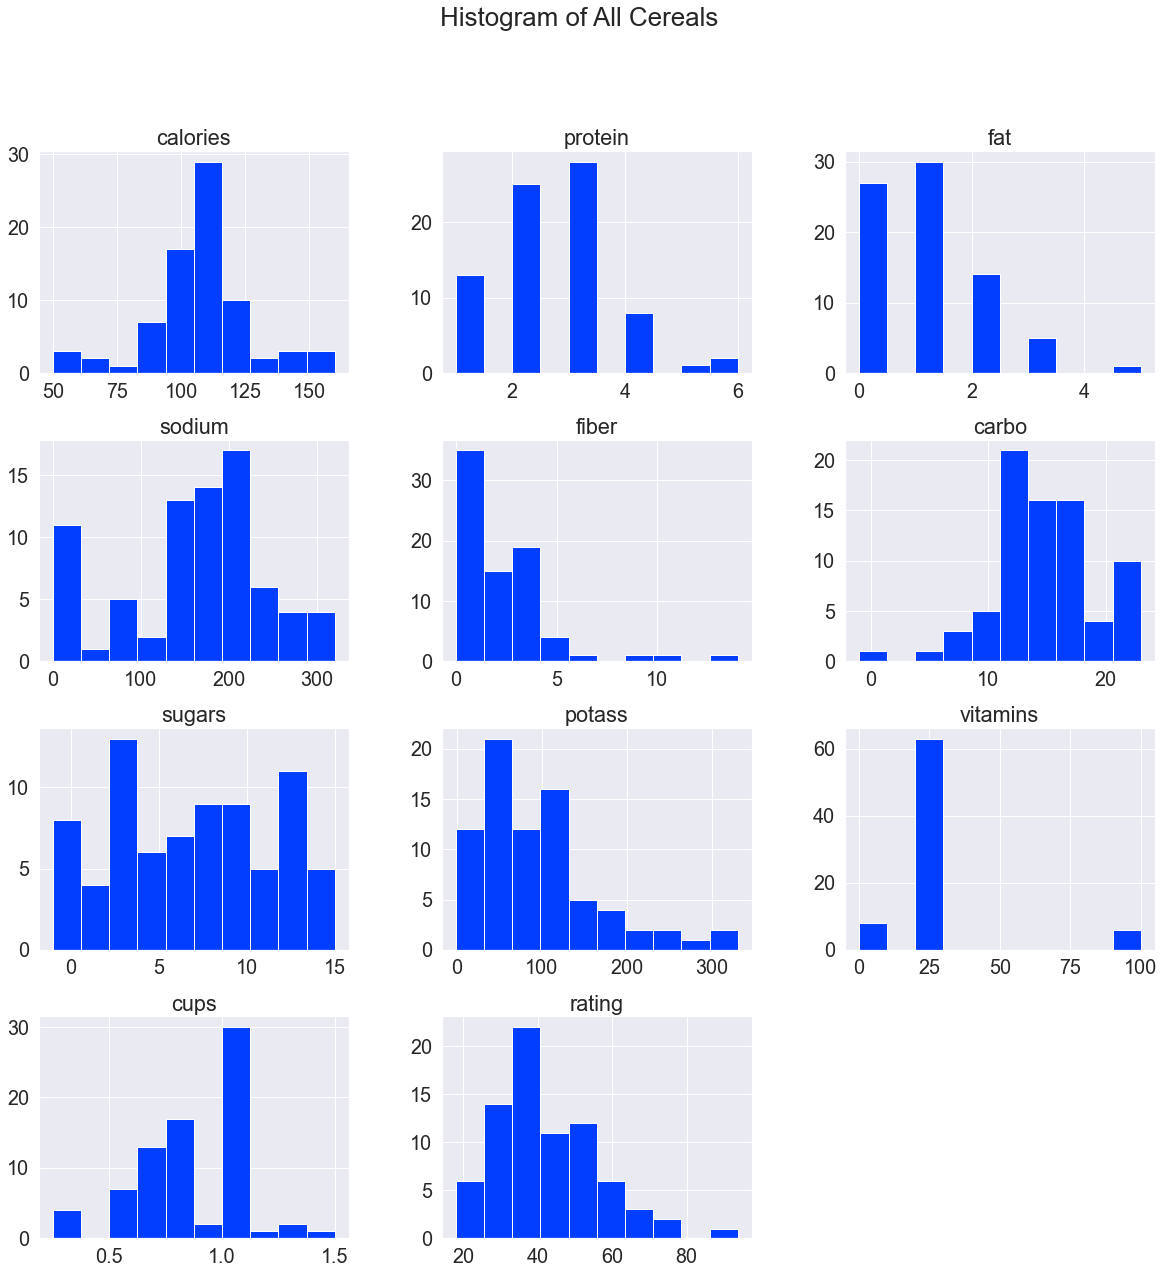

In [408]:
fig = plt.figure(figsize = (20,20))
ax = fig.gca()
df.hist(ax = ax)
fig.suptitle('Histogram of All Cereals')
plt.savefig('hist_all.png')

In [ ]:
cereal_cal = df.groupby('name')['calories'].sum().to_frame().sort_values(by=['calories'], ascending=False).reset_index()
cereal_sug = df.groupby('name')['sugars'].sum().to_frame().sort_values(by=['sugars'], ascending=False).reset_index()
cereal_fat = df.groupby('name')['fat'].sum().to_frame().sort_values(by=['fat'], ascending=False).reset_index()
cereal_carb = df.groupby('name')['carbo'].sum().to_frame().sort_values(by=['carbo'], ascending=False).reset_index()
cereal_salt = df.groupby('name')['sodium'].sum().to_frame().sort_values(by=['sodium'], ascending=False).reset_index()
cereal_pro = df.groupby('name')['protein'].sum().to_frame().sort_values(by=['protein'], ascending=False).reset_index()
cereal_fib = df.groupby('name')['fiber'].sum().to_frame().sort_values(by=['fiber'], ascending=False).reset_index()
cereal_rate = df.groupby('name')['rating'].sum().to_frame().sort_values(by=['rating'], ascending=False).reset_index()

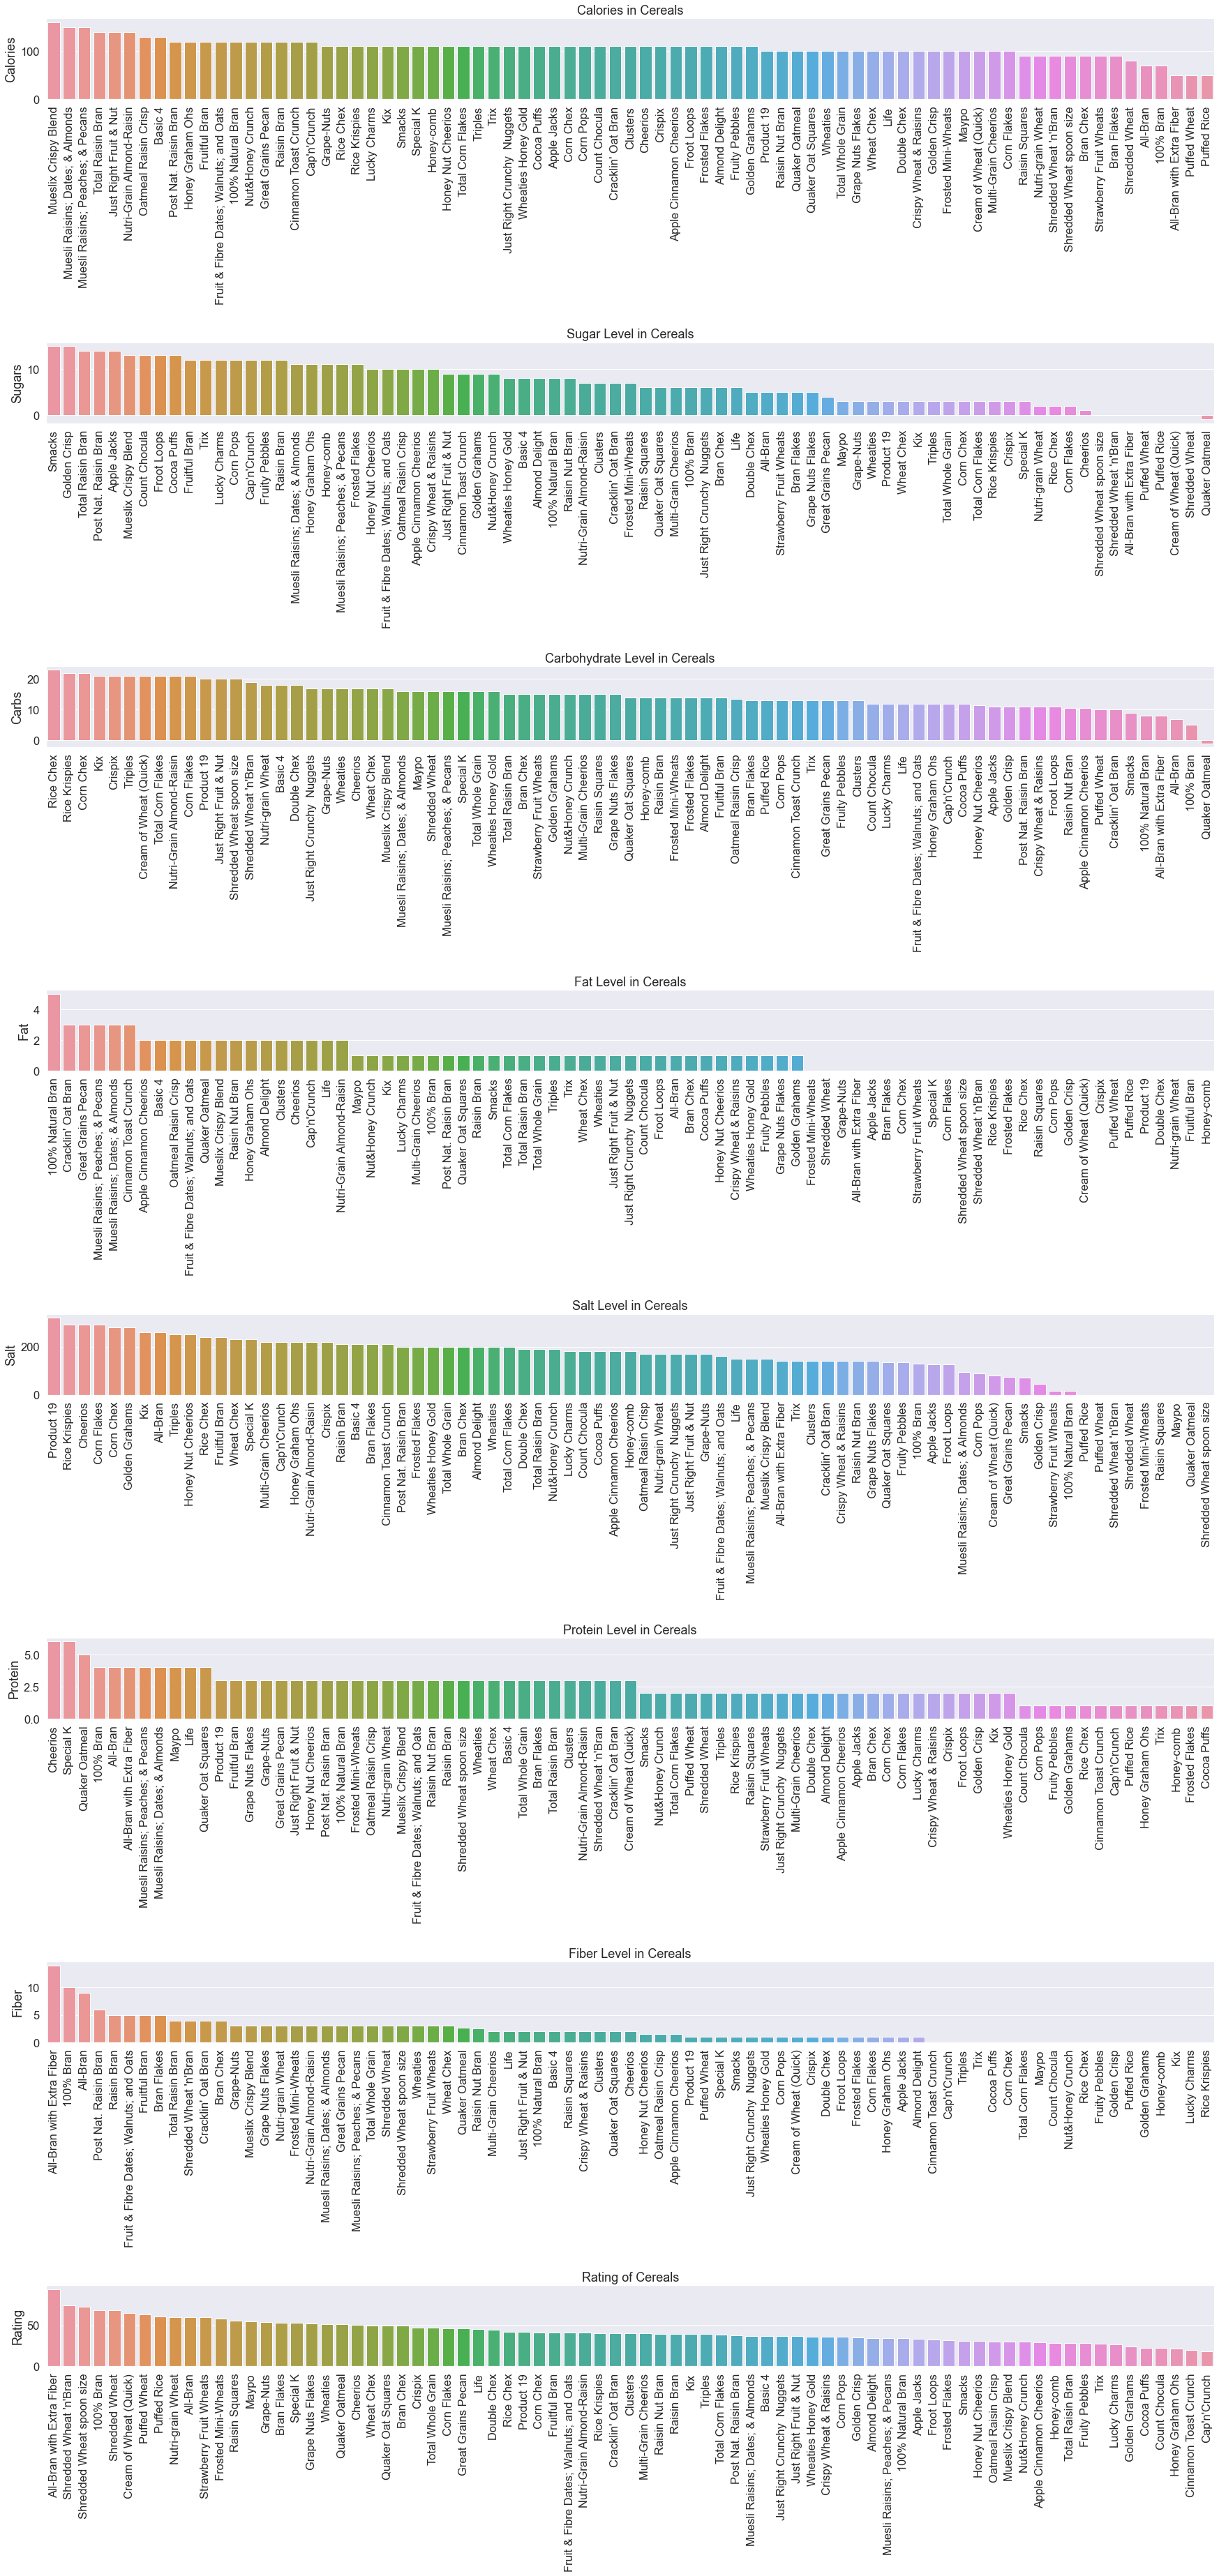

In [ ]:
f, ax = plt.subplots(figsize=(30,34))
sns.set_style('darkgrid')
sns.set(font_scale=1.5)

plt.subplot(811)
ax = sns.barplot(x='name', y='calories', data=cereal_cal)
ax.set_xticklabels(cereal_cal.name, rotation=90, ha='center')
ax.set(xlabel='',ylabel='Calories')
ax.set_title('Calories in Cereals')

plt.subplot(812)
ax = sns.barplot(x='name', y='sugars', data=cereal_sug)
ax.set_xticklabels(cereal_sug.name, rotation=90, ha='center')
ax.set(xlabel='',ylabel='Sugars')
ax.set_title('Sugar Level in Cereals')

plt.subplot(813)
ax = sns.barplot(x='name', y='carbo', data=cereal_carb)
ax.set_xticklabels(cereal_carb.name, rotation=90, ha='center')
ax.set(xlabel='',ylabel='Carbs')
ax.set_title('Carbohydrate Level in Cereals')

plt.subplot(814)
ax = sns.barplot(x='name', y='fat', data=cereal_fat)
ax.set_xticklabels(cereal_fat.name, rotation=90, ha='center')
ax.set(xlabel='',ylabel='Fat')
ax.set_title('Fat Level in Cereals')

plt.subplot(815)
ax = sns.barplot(x='name', y='sodium', data=cereal_salt)
ax.set_xticklabels(cereal_salt.name, rotation=90, ha='center')
ax.set(xlabel='',ylabel='Salt')
ax.set_title('Salt Level in Cereals')

plt.subplot(816)
ax = sns.barplot(x='name', y='protein', data=cereal_pro)
ax.set_xticklabels(cereal_pro.name, rotation=90, ha='center')
ax.set(xlabel='',ylabel='Protein')
ax.set_title('Protein Level in Cereals')

plt.subplot(817)
ax = sns.barplot(x='name', y='fiber', data=cereal_fib)
ax.set_xticklabels(cereal_fib.name, rotation=90, ha='center')
ax.set(xlabel='',ylabel='Fiber')
ax.set_title('Fiber Level in Cereals')

plt.subplot(818)
ax = sns.barplot(x='name', y='rating', data=cereal_rate)
ax.set_xticklabels(cereal_rate.name, rotation=90, ha='center')
ax.set(xlabel='',ylabel='Rating')
ax.set_title('Rating of Cereals')

plt.subplots_adjust(hspace=3, top=1.5)
plt.savefig('barplot_all.png')
plt.show()

## Ideal level for sugar, fat, and salt

* low in sugar: 5g of total sugars or less per 100g
* low in fat: 3g of saturated fat or less per 100g
* low in salt: 0.3g of salt or less per 100g

### However, we should avoid cereals which are high in these nutrients

* high in sugar: more than 22.5g of total sugars per 100g
* high in fat: more than 17.5g of fat per 100g
* high in salt: more than 1.5g of salt per 100g

In [410]:
healthy_cereals = df.loc[(df['sugars'] <= 5) & (df['sodium'] <= 0.3) 
                               & (df['fat'] < 2)]
df['healthy'] = np.where((df['sugars'] <= 5) & (df['sodium'] <= 0.3) 
                               & (df['fat'] < 2), 'yes','no')


avoid_cereals = df.loc[(df['sugars'] >= 10) & (df['sodium'] >= 1.5) 
                               & (df['fat'] >= 2)]    
df['avoid'] = np.where((df['sugars'] >= 10) & (df['sodium'] >= 1.5) 
                               & (df['fat'] >= 2), 'yes','no')

print(df.healthy.value_counts())
print(df.avoid.value_counts())

no     71
yes     6
Name: healthy, dtype: int64
no     69
yes     8
Name: avoid, dtype: int64


In [411]:
healthy = df[df.healthy == 'yes']
healthy = healthy.drop(['potass', 'vitamins', 'cups'], 1).groupby('name').mean().reset_index()
healthy

name  calories  protein  fat  sodium  fiber  carbo  \
0                      Maypo       100        4    1       0    0.0   16.0   
1                Puffed Rice        50        1    0       0    0.0   13.0   
2               Puffed Wheat        50        2    0       0    1.0   10.0   
3             Shredded Wheat        80        2    0       0    3.0   16.0   
4     Shredded Wheat 'n'Bran        90        3    0       0    4.0   19.0   
5  Shredded Wheat spoon size        90        3    0       0    3.0   20.0   

   sugars     rating  
0       3  54.850917  
1       0  60.756112  
2       0  63.005645  
3       0  68.235885  
4       0  74.472949  
5       0  72.801787

In [447]:
avg_healthy = healthy.mean()
avg_healthy

calories    76.666667
protein      2.500000
fat          0.166667
sodium       0.000000
fiber        1.833333
carbo       15.666667
sugars       0.500000
rating      65.687216
dtype: float64

<ipython-input-356-0bffa9ef219d>:13: UserWarning:

FixedFormatter should only be used together with FixedLocator



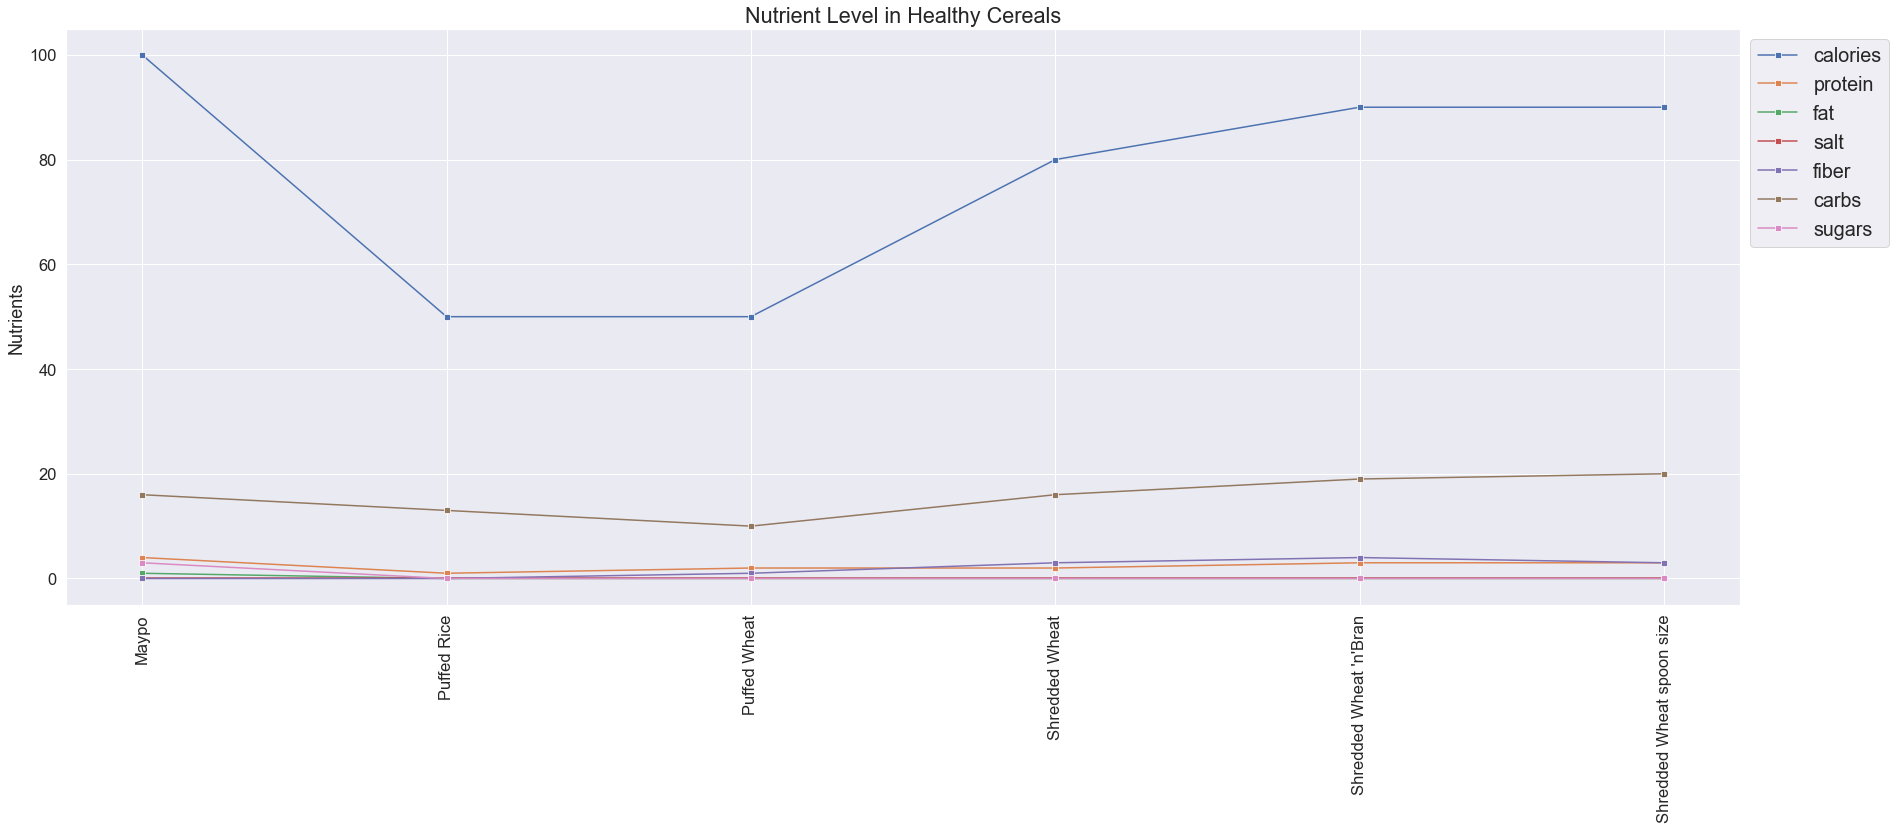

In [ ]:
f, ax = plt.subplots(figsize=(30,8))
sns.set_style('darkgrid')
sns.set(font_scale=1.8)
sns.set_palette('bright')

ax = sns.lineplot(x='name', y='calories', data=healthy, label='calories', marker='s')
ax = sns.lineplot(x='name', y='protein', data=healthy, label='protein', marker='s')
ax = sns.lineplot(x='name', y='fat', data=healthy, label='fat', marker='s')
ax = sns.lineplot(x='name', y='sodium', data=healthy, label='salt', marker='s')
ax = sns.lineplot(x='name', y='fiber', data=healthy, label='fiber', marker='s')
ax = sns.lineplot(x='name', y='carbo', data=healthy, label='carbs', marker='s')
ax = sns.lineplot(x='name', y='sugars', data=healthy, label='sugars', marker='s')
ax.set_xticklabels(healthy.name, rotation=90, ha='center')
ax.set(xlabel='',ylabel='Nutrients')
ax.set_title('Nutrient Level in Healthy Cereals')
plt.legend(loc=2, bbox_to_anchor=(1, 1))

plt.subplots_adjust(hspace=3, top=2, bottom=1)
plt.savefig('healthy_nutrients.png')
plt.show()

<ipython-input-412-c801d9412ee3>:4: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared



Text(0.5, 0.98, 'Histogram of Healthy Cereals')

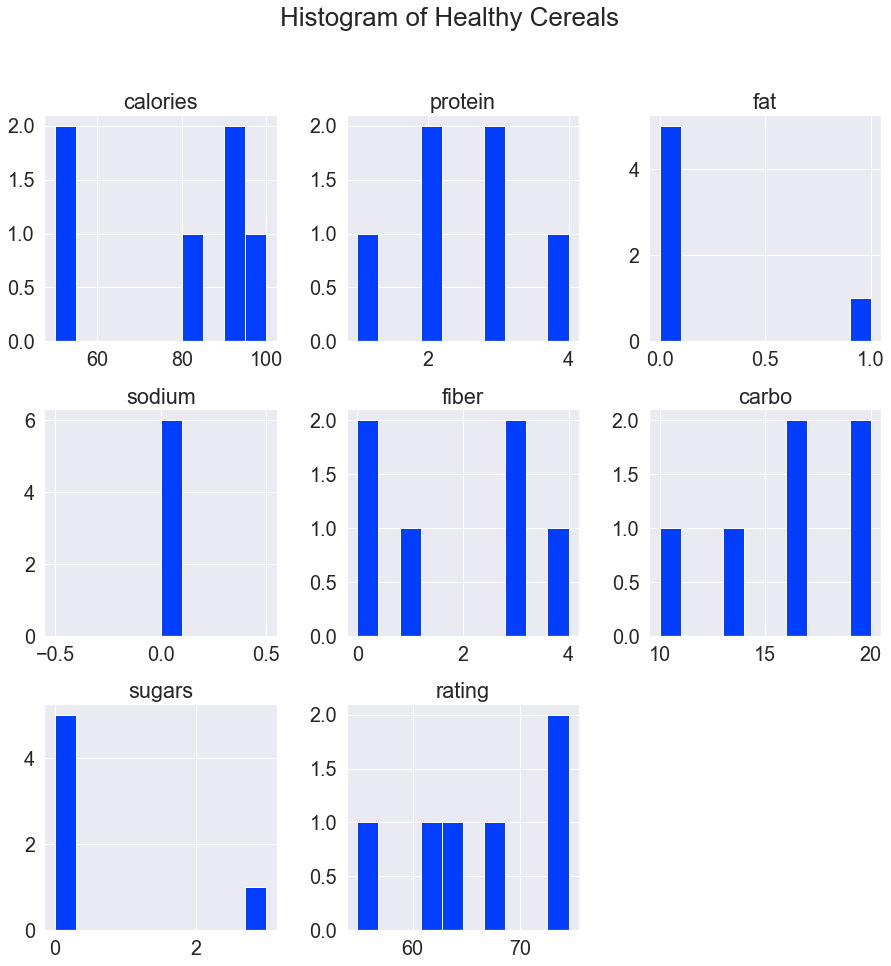

In [412]:
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
healthy.hist(ax = ax)
fig.suptitle('Histogram of Healthy Cereals')

## A heatmap is a data visualization tool that helps to represent the magnitude of the correlation between variables in the form of colors. Green means positive, red means negative. The stronger the color, the larger the correlation magnitude.

### Let's examine a heatmap of our healthy cereals to see what, if any, of the nutrient variables are correlated

[Text(0.5, 0, 'calories'),
 Text(1.5, 0, 'protein'),
 Text(2.5, 0, 'fat'),
 Text(3.5, 0, 'sodium'),
 Text(4.5, 0, 'fiber'),
 Text(5.5, 0, 'carbo'),
 Text(6.5, 0, 'sugars'),
 Text(7.5, 0, 'rating')]

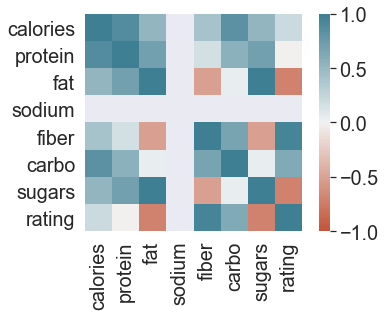

In [420]:
corr = healthy.corr()

ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    ha='center'
)

# Now we will be analyzing cereals to avoid

In [413]:
avoid = df[df.avoid == 'yes']
avoid = avoid.drop(['potass', 'vitamins', 'cups'], 1).groupby('name').mean().reset_index()
avoid

name  calories  protein  fat  sodium  \
0                 Apple Cinnamon Cheerios       110        2    2     180   
1                            Cap'n'Crunch       120        1    2     220   
2  Fruit & Fibre Dates; Walnuts; and Oats       120        3    2     160   
3                        Honey Graham Ohs       120        1    2     220   
4        Muesli Raisins; Dates; & Almonds       150        4    3      95   
5       Muesli Raisins; Peaches; & Pecans       150        4    3     150   
6                    Mueslix Crispy Blend       160        3    2     150   
7                    Oatmeal Raisin Crisp       130        3    2     170   

   fiber  carbo  sugars     rating  
0    1.5   10.5      10  29.509541  
1    0.0   12.0      12  18.042851  
2    5.0   12.0      10  40.917047  
3    1.0   12.0      11  21.871292  
4    3.0   16.0      11  37.136863  
5    3.0   16.0      11  34.139765  
6    3.0   17.0      13  30.313351  
7    1.5   13.5      10  30.450843

In [448]:
avg_avoid = avoid.mean()
avg_avoid

calories    132.500000
protein       2.625000
fat           2.250000
sodium      168.125000
fiber         2.250000
carbo        13.625000
sugars       11.000000
rating       30.297694
dtype: float64

<ipython-input-359-2bad0dfd53c4>:13: UserWarning:

FixedFormatter should only be used together with FixedLocator



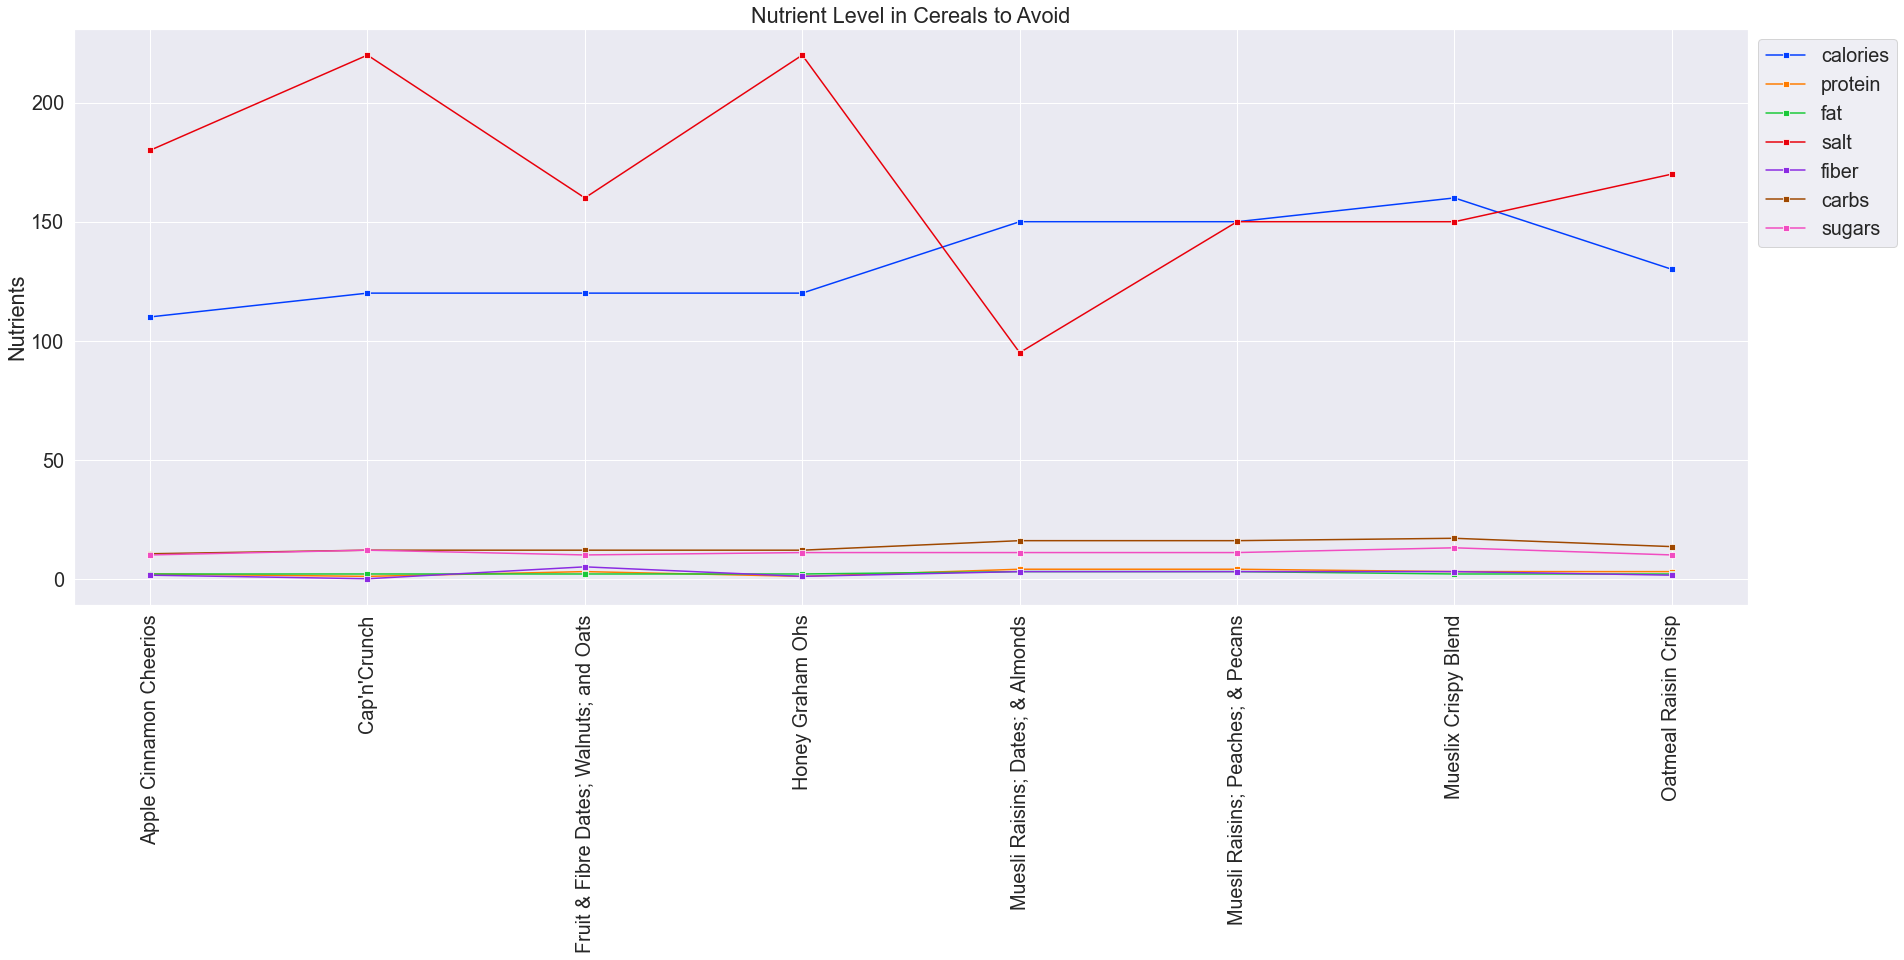

In [ ]:
f, ax = plt.subplots(figsize=(30,8))
sns.set_style('darkgrid')
sns.set(font_scale=1.8)
sns.set_palette('bright')

ax = sns.lineplot(x='name', y='calories', data=avoid, label='calories', marker='s')
ax = sns.lineplot(x='name', y='protein', data=avoid, label='protein', marker='s')
ax = sns.lineplot(x='name', y='fat', data=avoid, label='fat', marker='s')
ax = sns.lineplot(x='name', y='sodium', data=avoid, label='salt', marker='s')
ax = sns.lineplot(x='name', y='fiber', data=avoid, label='fiber', marker='s')
ax = sns.lineplot(x='name', y='carbo', data=avoid, label='carbs', marker='s')
ax = sns.lineplot(x='name', y='sugars', data=avoid, label='sugars', marker='s')
ax.set_xticklabels(avoid.name, rotation=90, ha='center')
ax.set(xlabel='',ylabel='Nutrients')
ax.set_title('Nutrient Level in Cereals to Avoid')
plt.legend(loc=2, bbox_to_anchor=(1, 1))

plt.subplots_adjust(hspace=3, top=2, bottom=1)
plt.savefig('avoid_nutrients.png')
plt.show()

<ipython-input-414-2afce8372a80>:3: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared



Text(0.5, 0.98, 'Histogram of Cereals to Avoid')

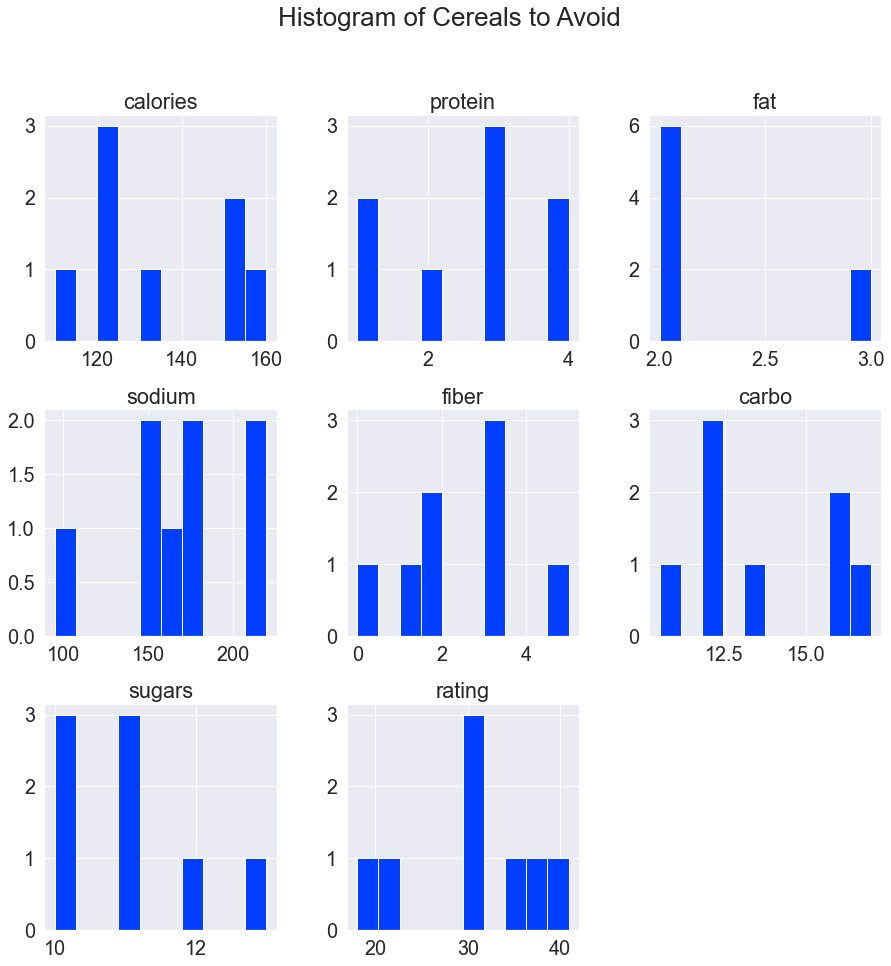

In [414]:
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
avoid.hist(ax = ax)
fig.suptitle('Histogram of Cereals to Avoid')

## A heatmap is a data visualization tool that helps to represent the magnitude of the correlation between variables in the form of colors. Green means positive, red means negative. The stronger the color, the larger the correlation magnitude.

### Let's examine a heatmap of our cereals to avoid to see what, if any, of the nutrient variables are correlated

[Text(0.5, 0, 'calories'),
 Text(1.5, 0, 'protein'),
 Text(2.5, 0, 'fat'),
 Text(3.5, 0, 'sodium'),
 Text(4.5, 0, 'fiber'),
 Text(5.5, 0, 'carbo'),
 Text(6.5, 0, 'sugars'),
 Text(7.5, 0, 'rating')]

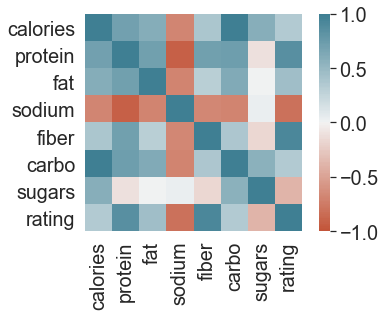

In [422]:
corr = avoid.corr()

ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    ha='center'
)

# Conclusion

## Based on the analysis above, we have determined that:

* Only 6 cereals that fall into the healthy category
* 8 cereals fall in to the 'Cereals to Avoid' category
* 63 cereals are not healthy but are not in the 'Avoid' category

## Healthy Cereals
All healthy cereals were under 100 calories per serving (between 50-100 calories), under 1 gram of fat, had little to no sodiun or sugar, and were under 20 carbs(between 10-20 carbs)

### Average
* 77 calories
* 2.5 protein
* 0.16 fat
* 0 salt
* 2 fiber
* 16 carbs
* 0.5 sugars
* 66 rating


## Cereals to Avoid
All cereals to avoid were greater than 110 calories, contained between 2-3 grams of fat, between 100 and 220 sodium, 10-17 carbs, 10-13 sugars, 18-40 rating 

### Average 
* 132 calories
* 2.25 fat
* 168 salt
* 2.25 fiber
* 14 carbs
* 11 sugars
* 30 rating